In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the data.
Note: sns.load_dataset returns a Pandas
      The default repository of seaborn example data is https://github.com/mwaskom/seaborn

In [2]:
titanic = sns.load_dataset("titanic")
type(titanic)

pandas.core.frame.DataFrame

Examine the dataset

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Examine parts of the panda

In [7]:
titanic.loc[0:1, ["sex", "age"]] 

,sex,age
0,male,22.0
1,female,38.0


Examine by physical idnex (defeats the whole purpose of labels for rows and columsn !)

In [8]:
titanic.iloc[0,3]

22.0

In [29]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Beware of undefined attributes ! Examine "deck"

In [ ]:
NOTE that we need to convert titanic.deck to Object in order to avoid problems with nan

In [97]:
titanic[ titanic.deck.notnull()].shape

(203, 15)

In [143]:
t2 = titanic[ titanic.deck.astype(object) != titanic.deck]
t2.loc[:2, ["deck"]]

,deck
0,NaN
2,NaN


In [123]:
titanic [ titanic.deck.astype(object) != titanic.deck ].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


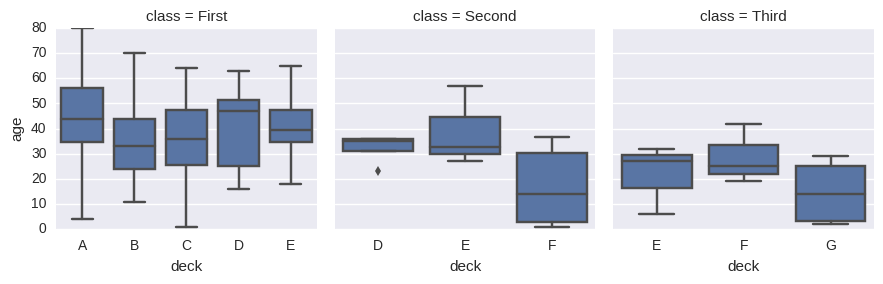

In [24]:
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False)
g.map(sns.boxplot, "deck", "age");

In [22]:
g.axes.shape

(1, 3)

# Play around with Pandas

In [145]:
 df1 = pd.DataFrame(np.random.randn(6,4),
   ....:                    index=list(range(0,12,2)),
   ....:                    columns=list(range(0,8,2)))
df1

,0,2,4,6
0,0.834757,-0.165571,-1.632632,-1.725846
2,1.255875,-0.055815,-2.160192,-0.054374
4,1.037670,-0.192591,0.319811,-0.605121
6,-0.574538,0.686051,0.383382,-0.552663
8,-2.795729,0.654971,-0.595064,0.822510
10,0.029213,-0.602735,1.869025,-0.524315


In [149]:
df1.iloc[1:5, 2:3]

,4
2,-2.160192
4,0.319811
6,0.383382
8,-0.595064


### Series has an index, so operations on a Series has an index as well

In [213]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))

In [ ]:
#### Series contains numpy arrays (plus and index)

In [214]:
dff.mean().values
dff.mean().index

array([ 0.10734575,  0.24469598,  0.26818343])

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
dff.resample()

In [215]:
type(dff.mean())
dff.mean().dtype
dff.mean().index
dff.mean()[['B', 'C']].index

pandas.core.series.Series

dtype('float64')

Index(['A', 'B', 'C'], dtype='object')

Index(['B', 'C'], dtype='object')

### Illustrate complex selection, and equivalent form using "query"

In [177]:
dates = pd.date_range('1/1/2000', periods=8)

df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,0.950449,-1.078358,1.469187,0.918737
2000-01-02,-0.516380,-1.441466,1.879935,1.854087
2000-01-03,0.114023,-0.890055,0.634314,1.912760
2000-01-04,-1.135315,-0.308947,0.054084,-0.746787
2000-01-05,1.340617,-1.562764,0.241417,-0.616313
2000-01-06,-0.013276,-0.615448,-0.368241,1.560250
2000-01-07,-0.366147,2.595179,-0.882810,-0.318262
2000-01-08,-1.420098,-1.001578,-1.765942,-0.127168


In [178]:
df[ (df.A < 0) & (df.B < -0.2) ]

,A,B,C,D
2000-01-02,-0.516380,-1.441466,1.879935,1.854087
2000-01-04,-1.135315,-0.308947,0.054084,-0.746787
2000-01-06,-0.013276,-0.615448,-0.368241,1.560250
2000-01-08,-1.420098,-1.001578,-1.765942,-0.127168


In [179]:
df.query('A < 0 and B < -0.2')

,A,B,C,D
2000-01-02,-0.516380,-1.441466,1.879935,1.854087
2000-01-04,-1.135315,-0.308947,0.054084,-0.746787
2000-01-06,-0.013276,-0.615448,-0.368241,1.560250
2000-01-08,-1.420098,-1.001578,-1.765942,-0.127168


### Illustrate MultiIndex and Pandas

In [180]:
n = 10

colors = np.random.choice(['red', 'green'], size=n)

foods = np.random.choice(['eggs', 'ham'], size=n)

index = pd.MultiIndex.from_arrays([colors, foods], names=['color', 'food'])

print("Colors: {cols}".format(cols=colors))

print ("Foods: {fds}".format(fds=foods))
       
print ("Index: {idx}".format(idx=index))
       

df = pd.DataFrame(np.random.randn(n, 2), index=index)
df

# Manually go in and examine the index
print ("  Index level 0 labels, examined manually: {labs}"
       .format(labs=df.index.levels[0] [ df.index.labels[0] ])
       )

Colors: ['green' 'green' 'red' 'green' 'green' 'red' 'green' 'green' 'red' 'red']
Foods: ['ham' 'ham' 'ham' 'eggs' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']
Index: MultiIndex(levels=[['green', 'red'], ['eggs', 'ham']],
           labels=[[0, 0, 1, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]],
           names=['color', 'food'])


0         1
color food                    
green ham  -0.471998  0.770847
      ham  -1.598680 -0.759112
red   ham   1.670623 -1.414789
green eggs  0.747550 -1.220385
      ham  -0.867856 -0.835079
red   ham  -0.459765  0.486247
green ham   0.049238  0.258088
      ham  -1.068376  1.696008
red   ham  -1.156600  0.614118
      ham  -0.468079  0.549674

  Index level 0 labels, examined manually: Index(['green', 'green', 'red', 'green', 'green', 'red', 'green', 'green',
       'red', 'red'],
      dtype='object', name='color')


### Multi-index selection

In [191]:
df[ df.index.isin(["red"], level=0) ]
df.query('color == "red"')


0         1
color food                    
red   ham   1.670623 -1.414789
      ham  -0.459765  0.486247
      ham  -1.156600  0.614118
      ham  -0.468079  0.549674

0         1
color food                    
red   ham   1.670623 -1.414789
      ham  -0.459765  0.486247
      ham  -1.156600  0.614118
      ham  -0.468079  0.549674

### Illustrate NaN handling

In [196]:
s = pd.Series( [ 1, 2, np.nan, 4])
s
s.isnull()
s.fillna(999)

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

0    False
1    False
2     True
3    False
dtype: bool

0      1.0
1      2.0
2    999.0
3      4.0
dtype: float64

In [207]:
print( "Count of s: {scount}, but count of s with NaN filled: {scountf}".
      format(scount=s.count(), scountf=s.interpolate().count())
      )

Count of s: 3, but count of s with NaN filled: 4


## From Cookbook

### applymap

In [219]:
df = pd.DataFrame(
   ....:      {'AAA' : [1,2,1,3], 'BBB' : [1,1,2,2], 'CCC' : [2,1,3,1]}); df

source_cols = df.columns # or some subset would work too.

new_cols = [str(x) + "_cat" for x in source_cols]

categories = {1 : 'Alpha', 2 : 'Beta', 3 : 'Charlie' }

df[source_cols]

df[new_cols] = df.applymap(categories.get);df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


### Aggregate: Two ways to get same result: 
aggregate by AAA, then, within the group, choose the row containing the minimum BBB
OR
sort by BBB (so that the smallest B's occur earlier), group by AAA, and choose first

In [223]:
df = pd.DataFrame(
   ....:      {'AAA' : [1,1,1,2,2,2,3,3], 'BBB' : [2,1,3,4,5,1,2,3]}); df

df.loc[df.groupby("AAA")["BBB"].idxmin()]

df.sort_values(by="BBB")

df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


,AAA,BBB
1,1,1
5,2,1
6,3,2


,AAA,BBB
1,1,1
5,2,1
0,1,2
6,3,2
2,1,3
7,3,3
3,2,4
4,2,5


,AAA,BBB
0,1,1
1,2,1
2,3,2


#### Multi-index

In [273]:
 df = pd.DataFrame({'row' : [0,1,2],
   ....:                    'One_X' : [1.1,1.1,1.1],
   ....:                    'One_Y' : [1.2,1.2,1.2],
   ....:                    'Two_X' : [1.11,1.11,1.11],
   ....:                    'Two_Y' : [1.22,1.22,1.22]});
    
df = df.set_index('row');df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [274]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns]);df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

#### Illustrate indexing with a multi-index, e.g., use parentheses

In [275]:
df.loc[:, ('One', 'X')]

row
0    1.1
1    1.1
2    1.1
Name: (One, X), dtype: float64

#### Column WAS multi-index; now it is the rows

In [276]:
df.stack(0)

X     Y
row                
0   One  1.10  1.20
    Two  1.11  1.22
1   One  1.10  1.20
    Two  1.11  1.22
2   One  1.10  1.20
    Two  1.11  1.22

In [277]:
df.stack(0).reset_index(1)

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


#### Slicing a multi index

In [278]:
coords = [('AA','one'),('AA','six'),('BB','one'),('BB','two'),('BB','six')]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11,22,33,44,55],index,['MyData']); df

df.xs('BB',level=0,axis=0)

df.xs('six',level=1,axis=0)

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

,MyData
one,33
two,44
six,55


,MyData
AA,22
BB,55


In [279]:
import itertools

index = list(itertools.product(['Ada','Quinn','Violet'],['Comp','Math','Sci']))

headr = list(itertools.product(['Exams','Labs'],['I','II']))

indx = pd.MultiIndex.from_tuples(index,names=['Student','Course'])

cols = pd.MultiIndex.from_tuples(headr) #Notice these are un-named

data = [[70+x+y+(x*y)%3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data,indx,cols); df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

#### Python slice() function

In [287]:
All = slice(None); All

print("Multi-index slice \n\tusing ':'\n {usecolon}, \n\n\tusing 'slice':\n{useslice}".
      format(usecolon=df.loc[('Ada', 'Sci'),:], useslice=df.loc[('Ada', 'Sci'), All]))


slice(None, None, None)

Multi-index slice 
	using ':'
 Exams  I     72
       II    75
Labs   I     75
       II    75
Name: (Ada, Sci), dtype: int64, 

	using 'slice':
Exams  I     72
       II    75
Labs   I     75
       II    75
Name: (Ada, Sci), dtype: int64


Exams  I     72
       II    75
Labs   I     75
       II    75
Name: (Ada, Sci), dtype: int64

Exams  I     72
       II    75
Labs   I     75
       II    75
Name: (Ada, Sci), dtype: int64

#### BUT, might need the "All" version as a wild-card for a part of the multi-index tuple ?

In [294]:
df.loc[(All, 'Math'),:]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [295]:
df.loc[(All,'Math'),(All,'II')]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


#### pd.IndexSlice is the visually nicer way than Python slice()
#### See: http://pandas.pydata.org/pandas-docs/stable/advanced.html

In [319]:
idx = pd.IndexSlice
df.loc[ idx[:,'Math'], idx[:,'II'] ]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


### Grouping

In [ ]:
 df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
   ....:                    'size': list('SSMMMLL'),
   ....:                    'weight': [8, 10, 11, 1, 20, 12, 12],
   ....:                    'adult' : [False] * 5 + [True] * 2}); df
   ....: 
    
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])

#### Examine the grouping object

In [322]:
gb = df.groupby(['animal'])

type(gb)

gb.get_group('cat')

,adult,animal,size,weight
0,False,cat,S,8
1,False,dog,S,10
2,False,cat,M,11
3,False,fish,M,1
4,False,dog,M,20
5,True,cat,L,12
6,True,cat,L,12


animal
cat     L
dog     M
fish    M
dtype: object

pandas.core.groupby.DataFrameGroupBy

,adult,animal,size,weight
0,False,cat,S,8
2,False,cat,M,11
5,True,cat,L,12
6,True,cat,L,12


#### Operations on the grouping object

In [324]:
 def GrowUp(x):
   ....:    avg_weight =  sum(x[x['size'] == 'S'].weight * 1.5)
   ....:    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
   ....:    avg_weight += sum(x[x['size'] == 'L'].weight)
   ....:    avg_weight /= len(x)
   ....:    return pd.Series(['L',avg_weight,True], index=['size', 'weight', 'adult'])
   ....: 
        
expected_df = gb.apply(GrowUp); expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [353]:
import functools

S = pd.Series([i / 100.0 for i in range(1,11)])
S

def CumSum(x,y):
    return x  + y


def Red(x):
    # Second arg to reduce is the "initalizer": value is pre-pended to x
    return functools.reduce(CumSum,x, 100)

# Expanding returns an Iterable
S.expanding().apply(Red)

0    0.01
1    0.02
2    0.03
3    0.04
4    0.05
5    0.06
6    0.07
7    0.08
8    0.09
9    0.10
dtype: float64

0    100.01
1    100.03
2    100.06
3    100.10
4    100.15
5    100.21
6    100.28
7    100.36
8    100.45
9    100.55
dtype: float64

#### More on groups: transform

In [38]:
df = pd.DataFrame({'A' : [1, 1, 2, 2], 'B' : [1, -1, 1, 2]}); df

gb = df.groupby('A')

def replace(g):
    mask = g < 0
    g.loc[mask] = g[~mask].mean()
    return g


gb.transform(replace)


,A,B
0,1,1
1,1,-1
2,2,1
3,2,2


,B
0,1.0
1,1.0
2,1.0
3,2.0


In [376]:
df = pd.DataFrame(data={'A' : [[2,4,8,16],[100,200],[10,20,30]], 'B' : [['a','b','c'],['jj','kk'],['ccc']]},index=['I','II','III'])
df

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


## Pandas Iterrows

In [382]:
ir = df.iterrows()

first_row = next( ir )
type(first_row)

tuple

#### Examine the tuple that is returned by the iterator

In [385]:
print("First: {first}, \n\tfirst[0]: {f0}, \n\tfirst[1]: {f1}, \n\t\ttype(first[1]): {f1t}".
      format(first=first_row, f0=first_row[0], f1=first_row[1], f1t=type(first_row[1])))

First: ('I', A    [2, 4, 8, 16]
B        [a, b, c]
Name: I, dtype: object), 
	first[0]: I, 
	first[1]: A    [2, 4, 8, 16]
B        [a, b, c]
Name: I, dtype: object, 
		type(first[1]): <class 'pandas.core.series.Series'>


In [375]:
def SeriesFromSubList(aList):
    return pd.Series(aList)


d = dict([ (ind,row.apply(SeriesFromSubList)) for ind,row in df.iterrows() ])
print( "dict keys: ", d.keys())
print( "dict values:", d.values())
k0= list(d.keys())[0]
print( "dict value at key {k}: {v}".format(k=k0, v=d[k0]))


next( df.iterrows() )[0]

df_orgz = pd.concat(dict([ (ind,row.apply(SeriesFromSubList)) for ind,row in df.iterrows() ]))
df_orgz

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


dict keys:  dict_keys(['III', 'II', 'I'])
dict values: dict_values([     0     1     2
A   10  20.0  30.0
B  ccc   NaN   NaN,      0    1
A  100  200
B   jj   kk,    0  1  2     3
A  2  4  8  16.0
B  a  b  c   NaN])
dict value at key III:      0     1     2
A   10  20.0  30.0
B  ccc   NaN   NaN


'I'

0    1    2     3
I   A    2    4    8  16.0
    B    a    b    c   NaN
II  A  100  200  NaN   NaN
    B   jj   kk  NaN   NaN
III A   10   20   30   NaN
    B  ccc  NaN  NaN   NaN

#### Rolling window operation through array of slices of a Panda

In [403]:
rng = pd.date_range(start = '2014-01-01',periods = 10)
df = pd.DataFrame({'Open' : np.random.randn(len(rng)),
               'Close' : np.random.randn(len(rng)),
                   'Volume' : np.random.randint(100,2000,len(rng))}, index=rng); df.head()
   
def vwap(bars): return ((bars.Close*bars.Volume).sum()/bars.Volume.sum())
                        
window=3

# Create array of slices
sers = [ (pd.Series(vwap(df.iloc[i:i+window]),
                    index=[df.index[i+window]])
                    ) 
                   for i in range(len(df)-window)
                  ]

for ser in sers: 
        print("Next series: type {t}, length: {l}, keys: {k}, value: {sv}".
                            format(t=type(ser), l=len(ser), k=ser.index, sv=ser))

s = pd.concat(sers);
                        
s.round(2).head()         

,Close,Open,Volume
2014-01-01,-1.208500,-0.927782,1437
2014-01-02,-0.585193,0.834096,546
2014-01-03,-2.247408,0.427288,997
2014-01-04,4.079393,-0.863054,212
2014-01-05,-0.697267,-0.881669,737


Next series: type <class 'pandas.core.series.Series'>, length: 1, keys: DatetimeIndex(['2014-01-04'], dtype='datetime64[ns]', freq=None), value: 2014-01-04   -1.441878
dtype: float64
Next series: type <class 'pandas.core.series.Series'>, length: 1, keys: DatetimeIndex(['2014-01-05'], dtype='datetime64[ns]', freq=None), value: 2014-01-05   -0.966011
dtype: float64
Next series: type <class 'pandas.core.series.Series'>, length: 1, keys: DatetimeIndex(['2014-01-06'], dtype='datetime64[ns]', freq=None), value: 2014-01-06   -0.971079
dtype: float64
Next series: type <class 'pandas.core.series.Series'>, length: 1, keys: DatetimeIndex(['2014-01-07'], dtype='datetime64[ns]', freq=None), value: 2014-01-07    0.366441
dtype: float64
Next series: type <class 'pandas.core.series.Series'>, length: 1, keys: DatetimeIndex(['2014-01-08'], dtype='datetime64[ns]', freq=None), value: 2014-01-08   -0.053094
dtype: float64
Next series: type <class 'pandas.core.series.Series'>, length: 1, keys: DatetimeIndex

2014-01-04   -1.44
2014-01-05   -0.97
2014-01-06   -0.97
2014-01-07    0.37
2014-01-08   -0.05
dtype: float64

### Explore difference between apply and transform
## NOTE: transform ONLY works on groups
##             apply works on non-groups as well
##                  when used in a group, apply gets the full df
##                  when used in a non-group, it gets a column at a time

In [20]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
        
                   'C' : np.arange(8), 'D' : np.arange(8)[::-1]})
df

def MyFunc(arg):
        print("MyFunc {n} arg type {t}:\n\t ".format(n=arg.name, t=type(arg)),  arg)
        print("\n")
      
        return arg.mean()
    

def MyFunc2(arg):
    print("MyFunc2 {n} arg: ".format(n=arg.name),  arg)
    print("\n")
    return arg + 1

# Apply gets fed one group (all columns) and can return ANY shape
print("Illustrate apply on groups:\n")
df.groupby('A').apply(MyFunc)

print("Illustrate apply on non-groups:\n")
df.loc[:, ['C', 'D']].apply(MyFunc)

# Transform gets fed ONE column at a time and has to return SAME shape
print("Illustrate transform\n")
df.groupby('A').transform(MyFunc2)


,A,C,D
0,foo,0,7
1,bar,1,6
2,foo,2,5
3,bar,3,4
4,foo,4,3
5,bar,5,2
6,foo,6,1
7,foo,7,0


Illustrate apply on groups:

MyFunc bar arg type <class 'pandas.core.frame.DataFrame'>:
	       A  C  D
1  bar  1  6
3  bar  3  4
5  bar  5  2


MyFunc foo arg type <class 'pandas.core.frame.DataFrame'>:
	       A  C  D
0  foo  0  7
2  foo  2  5
4  foo  4  3
6  foo  6  1
7  foo  7  0




,C,D
A,,
bar,3.0,4.0
foo,3.8,3.2


Illustrate apply on non-groups:

MyFunc C arg type <class 'pandas.core.series.Series'>:
	  0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
Name: C, dtype: int64


MyFunc D arg type <class 'pandas.core.series.Series'>:
	  0    7
1    6
2    5
3    4
4    3
5    2
6    1
7    0
Name: D, dtype: int64




C    3.5
D    3.5
dtype: float64

Illustrate transform

MyFunc2 C arg:  1    1
3    3
5    5
Name: C, dtype: int64


MyFunc2 C arg:  1    1
3    3
5    5
Name: C, dtype: int64


MyFunc2 D arg:  1    6
3    4
5    2
Name: D, dtype: int64


MyFunc2 bar arg:     C  D
1  1  6
3  3  4
5  5  2


MyFunc2 foo arg:     C  D
0  0  7
2  2  5
4  4  3
6  6  1
7  7  0




,C,D
0,1,8
1,2,7
2,3,6
3,4,5
4,5,4
5,6,3
6,7,2
7,8,1


## Modern Pandas, Part 6: http://tomaugspurger.github.io/modern-6-visualization.html

In [3]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [460]:
sns.set(context='talk', style='ticks')

%matplotlib inline

####    Matplotlib http://nbviewer.jupyter.org/gist/TomAugspurger/cd5197cef13d6103aba01abb4569d266#Matplotlib

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

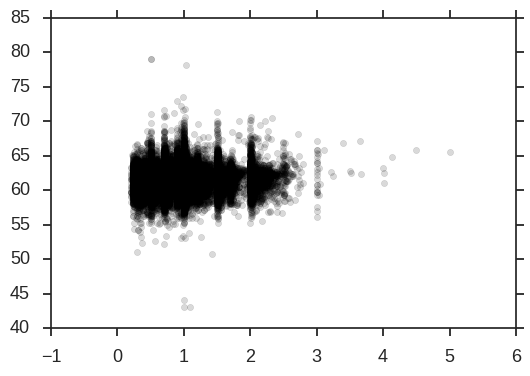

In [466]:
df.carat.describe()
df.depth.describe()

fig, ax = plt.subplots()

ax.scatter(x='carat', y='depth', data=df, c='k', alpha=.15)
# plt.savefig('../content/images/mpl-scatter.png', transparent=True)

####     Pandas built-in plotting
http://nbviewer.jupyter.org/gist/TomAugspurger/cd5197cef13d6103aba01abb4569d266#Pandas-Built-in-Plotting

n.b., need to fiond pandas_datareader

In [467]:
from pandas_datareader import fred

gdp = fred.FredReader(['GCEC96', 'GPDIC96'], start='2000-01-01').read()

gdp.rename(columns={"GCEC96": "Government Expenditure",
                    "GPDIC96": "Private Investment"}).plot(figsize=(12, 6))
plt.tight_layout()
# plt.savefig('../content/images/vis-gdp.svg', transparent=True)

ImportError: No module named 'pandas_datareader'

####      Seaborn
http://nbviewer.jupyter.org/gist/TomAugspurger/cd5197cef13d6103aba01abb4569d266#Seaborn

<module 'seaborn' from '/opt/conda/lib/python3.5/site-packages/seaborn/__init__.py'>

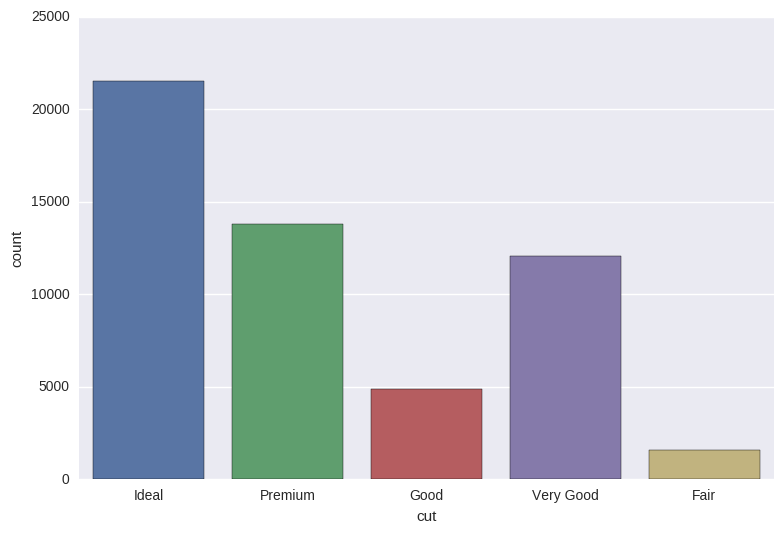

In [4]:
df.cut.describe() 
df.cut.values
df.cut.value_counts()

sns.countplot(x='cut', data=df)
sns.despine()
plt.tight_layout()
sns# plt.savefig('../content/images/vis-countplot.svg', transparent=True)

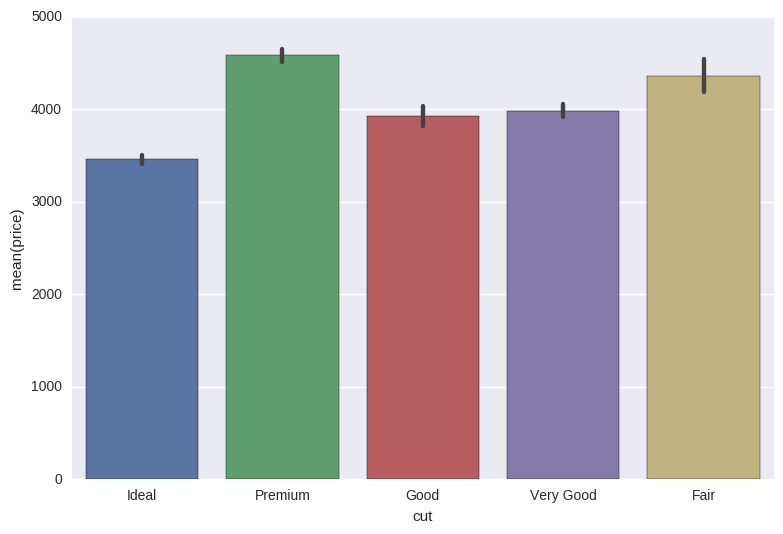

In [5]:
# sns.barplot?

sns.barplot(x='cut', y='price', data=df)
sns.despine()
plt.tight_layout()
# plt.savefig('../content/images/vis-barplot.svg', transparent=True)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


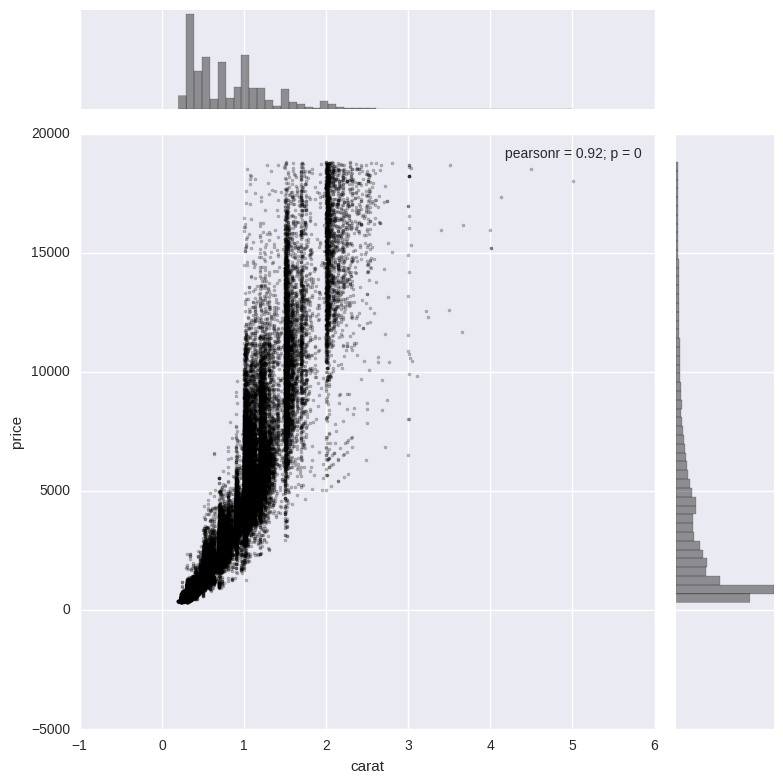

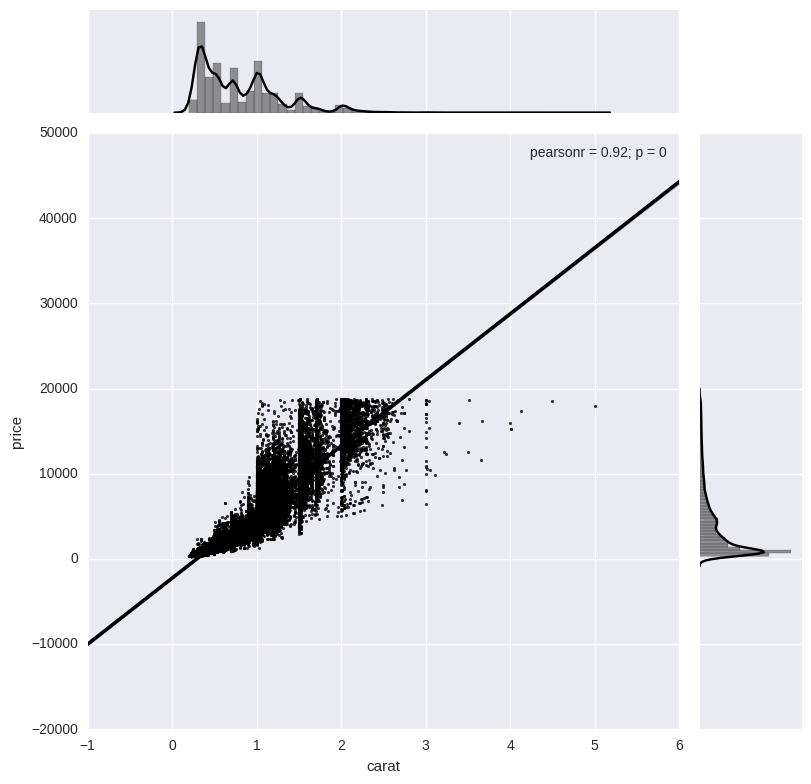

In [6]:
# sns.jointplot?

sns.jointplot(x='carat', y='price', data=df, size=8, alpha=.25,
              color='k', marker='.')
plt.tight_layout()


sns.jointplot(x='carat', y='price', data=df, size=8, 
              color='k', marker='.', kind='reg')
# plt.savefig('../content/images/vis-joinplot.png', transparent=True)

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

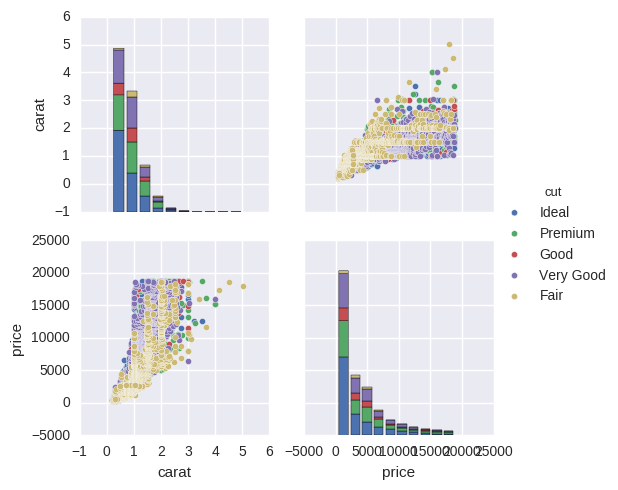

In [34]:
Ccols = df.columns[ df.columns.str[0] == 'c' ]
subsetOfCols = np.append(Ccols, ['price'])

# NOTE: can't plot Categorical variables (cut, color, clarity)
# Can restrict to a particular type. e.g., df.select_dtypes(include=[np.number])
df1 = df.loc[ :, subsetOfCols]
df1.columns
g = sns.pairplot(df1, hue='cut')
# plt.savefig('../content/images/vis-pairplot.png', transparent=True)

In [36]:
x = df.select_dtypes(include=[np.number])
x[(x > x.quantile(.05)).all(1) & (x < x.quantile(.95)).all(1)].head()

,Unnamed: 0,carat,depth,table,price,x,y,z
2697,2698,0.90,61.1,58.0,3246,6.22,6.18,3.79
2702,2703,0.31,60.8,56.0,562,4.38,4.40,2.67
2703,2704,0.31,61.1,57.0,562,4.37,4.40,2.68
2706,2707,0.31,61.3,55.0,562,4.36,4.38,2.68
2707,2708,0.39,62.4,59.0,562,4.58,4.65,2.88


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


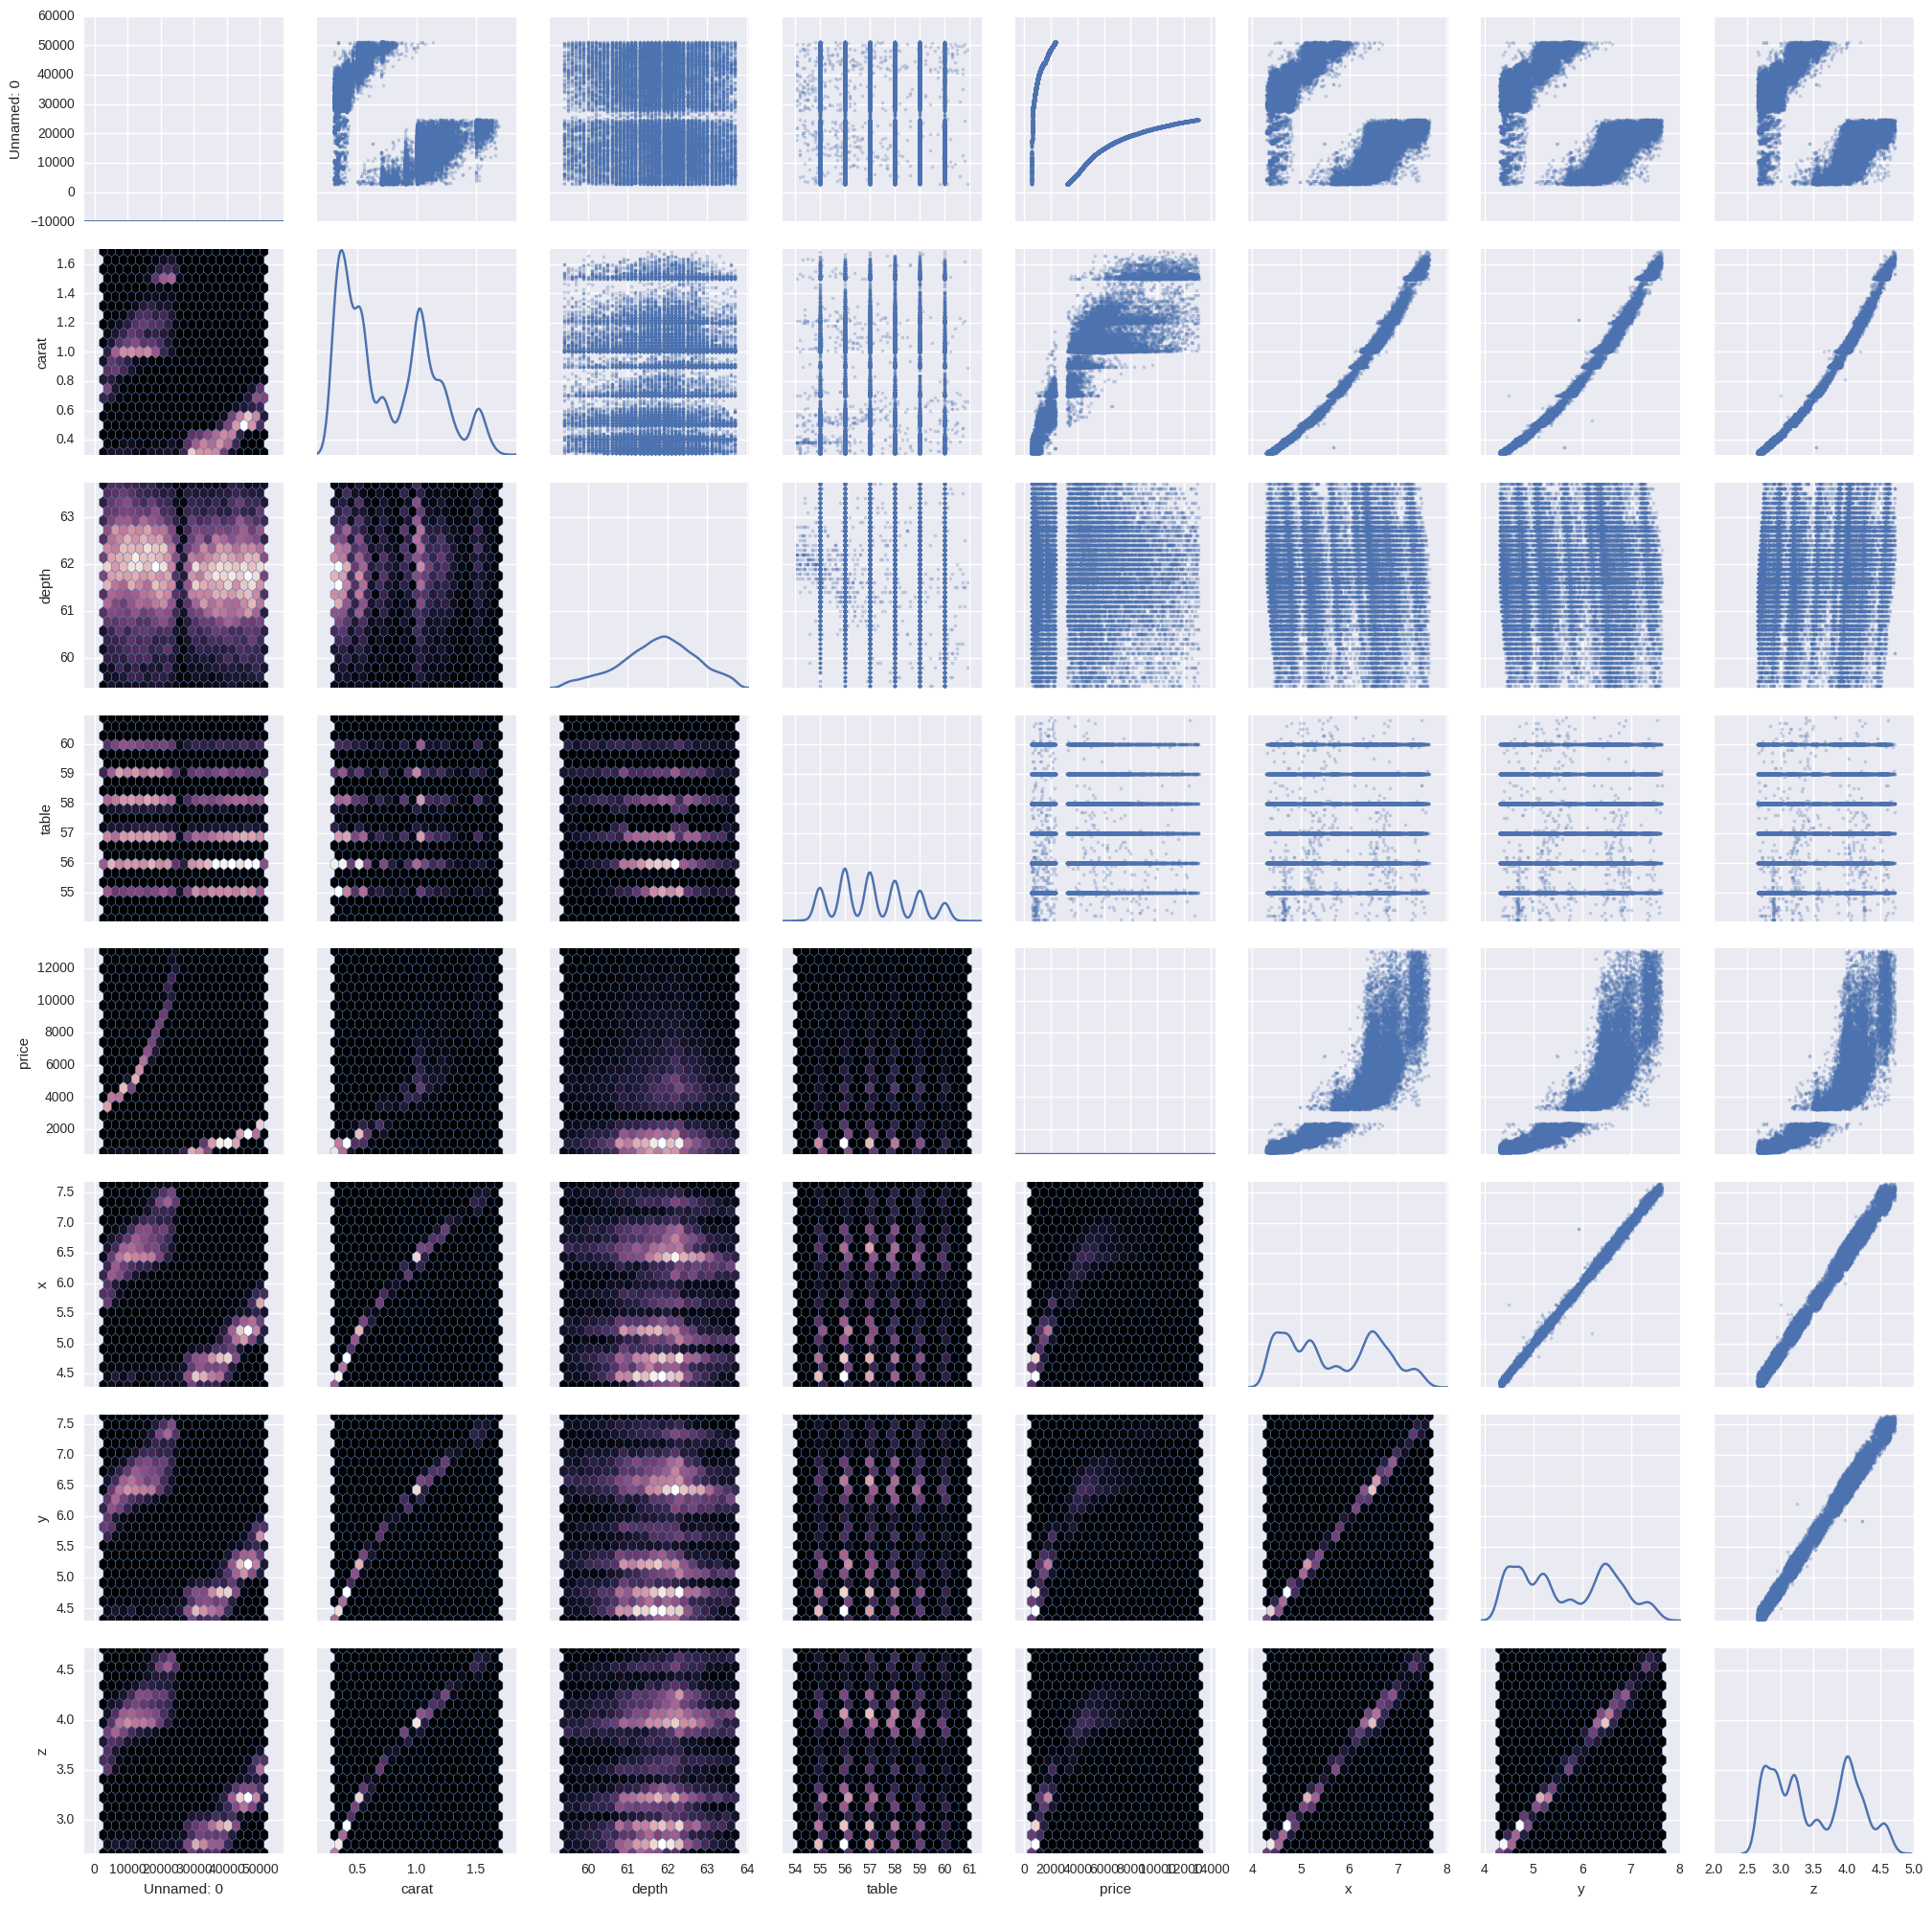

In [38]:
def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (x < df.quantile(1 - α)).all(1)
    return df[mask]

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
)
# plt.savefig('../content/images/vis-pairgrid.png', transparent=True)

In [5]:
agged = df.groupby(['cut', 'color']).mean().sort_index().reset_index().head(100)

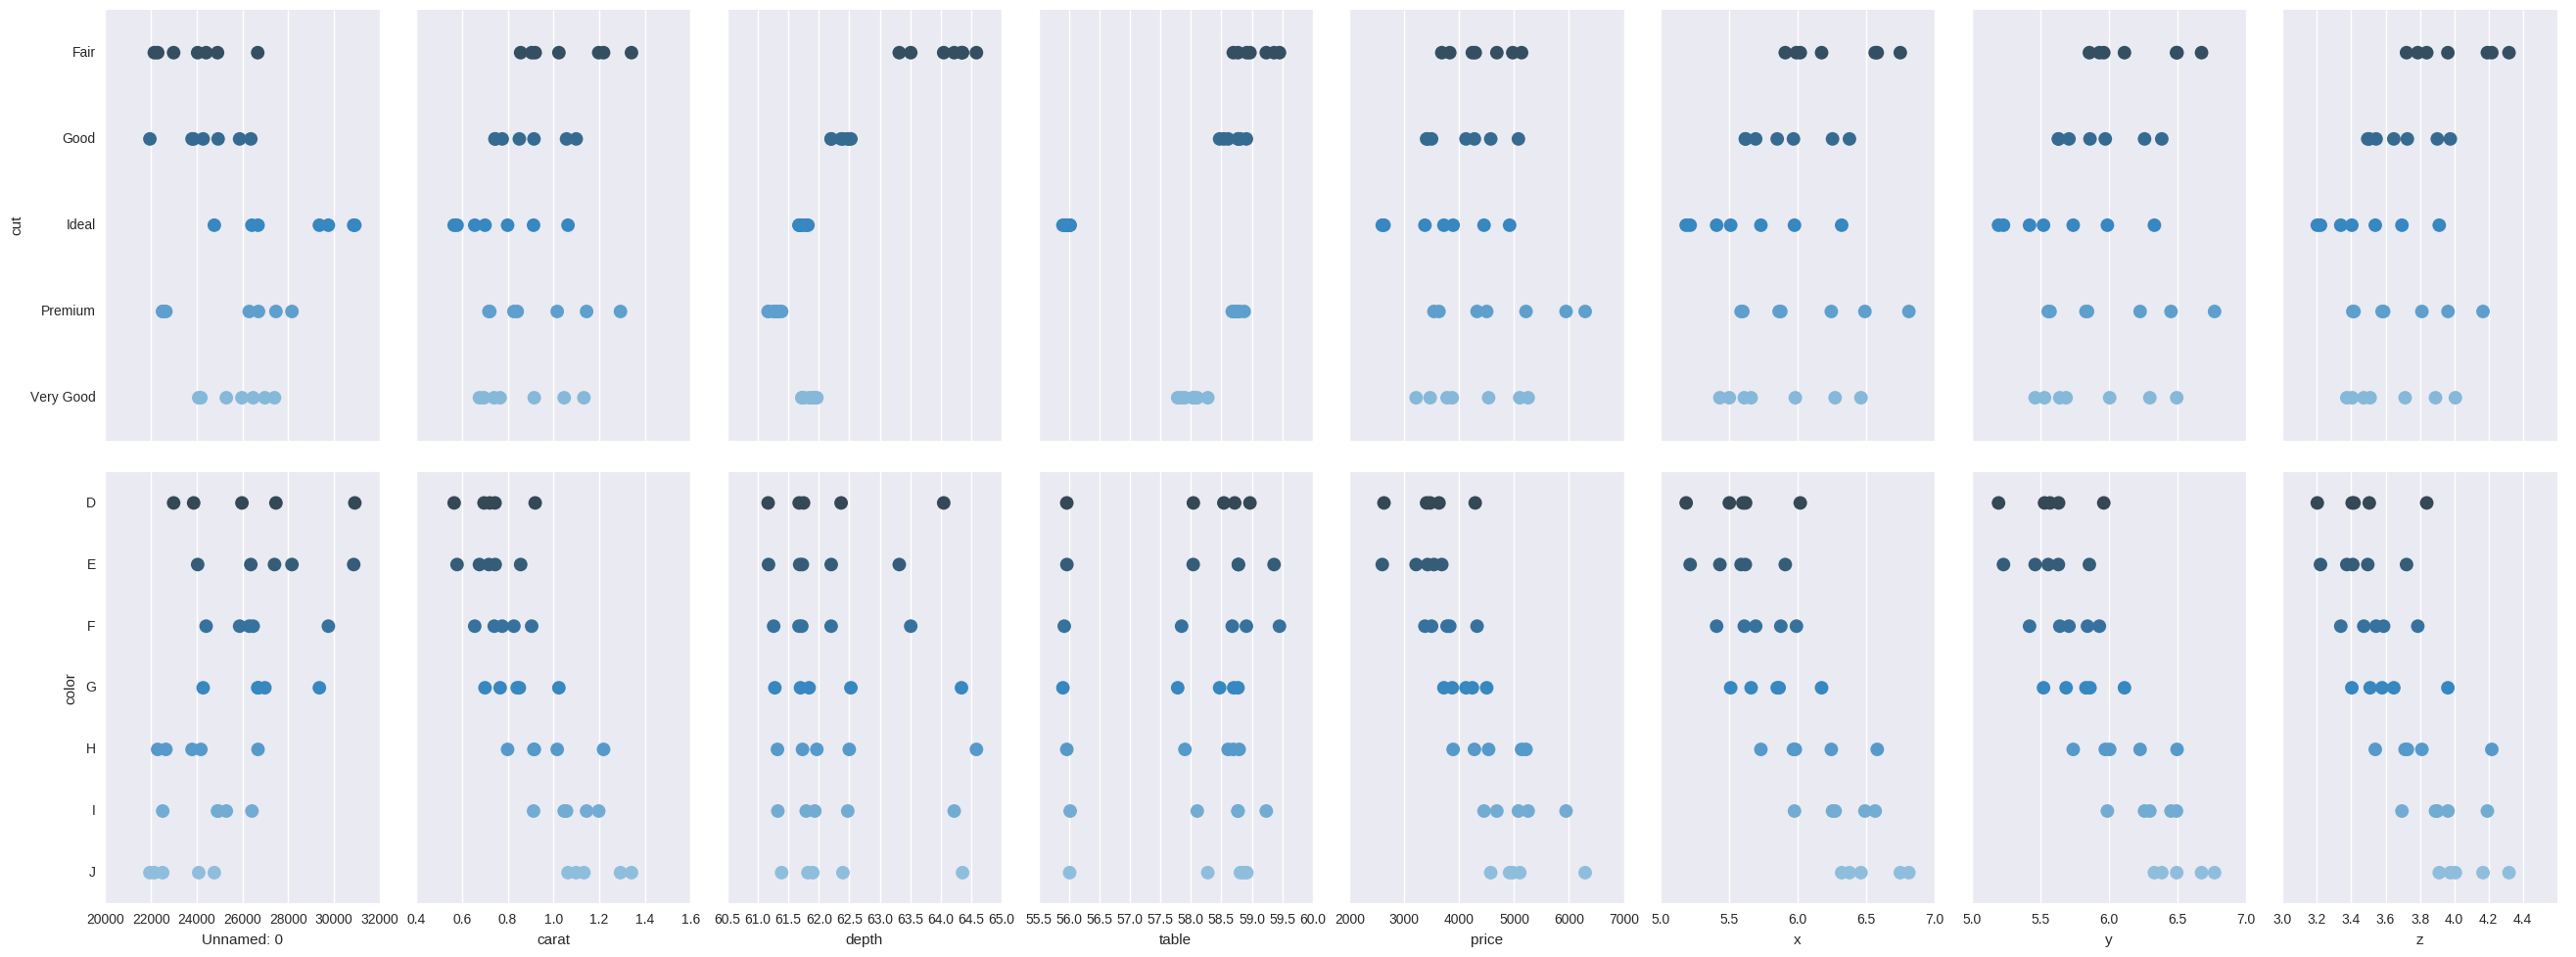

In [7]:
g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['cut', 'color'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d')
#plt.tight_layout()
# plt.savefig('../content/images/facet-stripplot.svg', transparent=True)

#### scikit-learn example

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df = sns.load_dataset('titanic')

clf = RandomForestClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = df['survived']
X = df.drop(['survived', 'who', 'alive'], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())
est.fit(X, y);

scores = est.grid_scores_

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:680: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [25]:
type(scores)
scores[0]
scores[0].parameters


list

mean: 0.76655, std: 0.00420, params: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 2}

{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}

,mean_,std_,max_depth,min_samples_leaf,min_samples_split
0,0.767677,0.050016,1,2,2
1,0.750842,0.064649,1,2,5
2,0.741863,0.032217,1,2,10
3,0.749719,0.065308,1,3,2
4,0.758698,0.009655,1,3,5


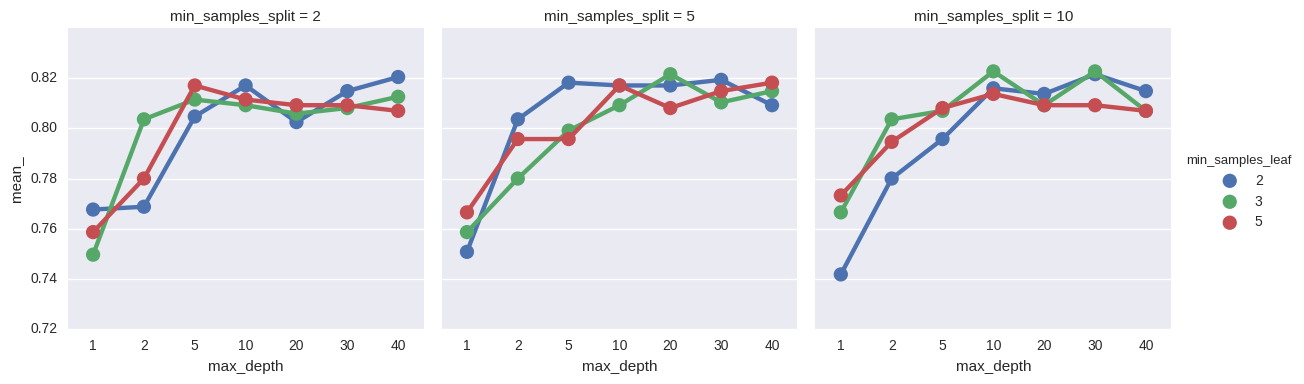

In [29]:
rows = []
params = sorted(scores[0].parameters)
for row in scores:
    mean = row.mean_validation_score
    std = row.cv_validation_scores.std()
    rows.append([mean, std] + [row.parameters[k] for k in params])
scores = pd.DataFrame(rows, columns=['mean_', 'std_'] + params)

scores.head()

sns.factorplot(x='max_depth', y='mean_', data=scores, col='min_samples_split',
               hue='min_samples_leaf')

## Modern Pandas Part 7 (Time Series)
http://tomaugspurger.github.io/modern-7-timeseries.html

## Illustrate Pivot table

In [44]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....: 
        
df  

# Essentially: group-by [A,B, C], summarizing with value of 'D'
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

,A,B,C,D,E
0,one,A,foo,-0.817914,0.439317
1,one,B,foo,-0.443737,1.560144
2,two,C,foo,-0.550609,0.592101
3,three,A,bar,-0.996843,0.956472
4,one,B,bar,0.432341,-0.149219
5,one,C,bar,-0.052756,0.153083
6,two,A,foo,0.614261,-0.711203
7,three,B,foo,0.665446,0.073888
8,one,C,foo,-0.722712,-0.354790
9,one,A,bar,-0.716314,-1.842198


C             bar       foo
A     B                    
one   A -0.716314 -0.817914
      B  0.432341 -0.443737
      C -0.052756 -0.722712
three A -0.996843       NaN
      B       NaN  0.665446
      C -0.886203       NaN
two   A       NaN  0.614261
      B -0.600478       NaN
      C       NaN -0.550609